# Load Data

In [46]:
import numpy as np

data = np.loadtxt('data.csv', delimiter=',')
labels = np.loadtxt('labels.csv', dtype = 'str', delimiter=',')

In [47]:
data.shape, labels.shape

((1317, 490), (1317,))

In [100]:
from collections import Counter
classes = list(Counter(labels).keys())
num_class_instances = list(Counter(labels).values())
classes, num_class_instances

(['banjo',
  'cello',
  'clarinet',
  'english-horn',
  'guitar',
  'oboe',
  'trumpet',
  'violin'],
 [23, 191, 191, 234, 22, 184, 139, 333])

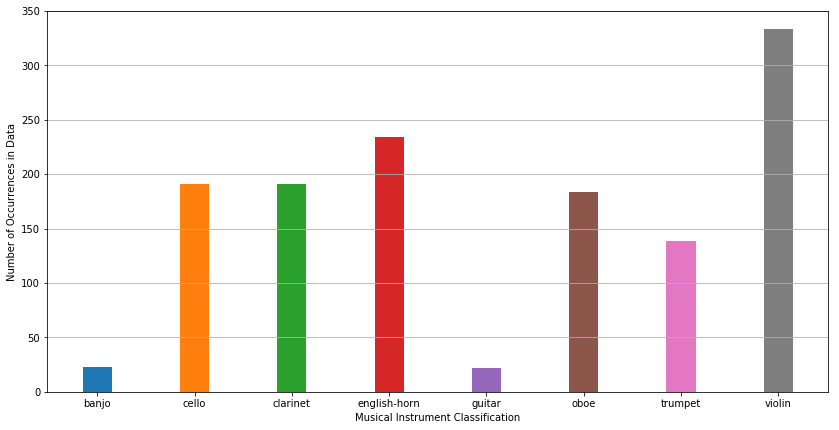

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
for i, key in enumerate(list(Counter(labels).keys())): 
    plt.bar(key, list(Counter(labels).values())[i],width = 0.3)

plt.grid(axis='y')
plt.xlabel('Musical Instrument Classification')
plt.ylabel('Number of Occurrences in Data')

plt.savefig('data_distribution.jpg')
plt.show()

# Model 1: Artificial Neural Network

## Finding the best hyperparameters via GridSearch

In [56]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=2000)

param_grid = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(5, 2), (2, 5), (10, 5), (5, 10), (10, 10), (20, 10), (10, 20)]
}

In [57]:
from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(clf, param_grid, cv=5)
classifier.fit(data, labels)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in 

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't conv

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [(5, 2), (2, 5), (10, 5), (5, 10), (10, 10), (20, 10), (10, 20)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
classifier.best_score_, classifier.best_params_
# 0.9537 Params: {'activation': 'tanh', 'hidden_layer_sizes': (20, 10), 'solver': 'adam'}

(0.9536826119969628,
 {'activation': 'tanh', 'hidden_layer_sizes': (20, 10), 'solver': 'adam'})

In [59]:
for mean, params in zip(classifier.cv_results_['mean_test_score'], classifier.cv_results_['params']):
        print('%0.4f Params: %r' % (mean, params))

0.0866 Params: {'activation': 'identity', 'hidden_layer_sizes': (5, 2), 'solver': 'lbfgs'}
0.0175 Params: {'activation': 'identity', 'hidden_layer_sizes': (5, 2), 'solver': 'sgd'}
0.6765 Params: {'activation': 'identity', 'hidden_layer_sizes': (5, 2), 'solver': 'adam'}
0.1374 Params: {'activation': 'identity', 'hidden_layer_sizes': (2, 5), 'solver': 'lbfgs'}
0.0175 Params: {'activation': 'identity', 'hidden_layer_sizes': (2, 5), 'solver': 'sgd'}
0.7365 Params: {'activation': 'identity', 'hidden_layer_sizes': (2, 5), 'solver': 'adam'}
0.1063 Params: {'activation': 'identity', 'hidden_layer_sizes': (10, 5), 'solver': 'lbfgs'}
0.0175 Params: {'activation': 'identity', 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}
0.9347 Params: {'activation': 'identity', 'hidden_layer_sizes': (10, 5), 'solver': 'adam'}
0.1215 Params: {'activation': 'identity', 'hidden_layer_sizes': (5, 10), 'solver': 'lbfgs'}
0.0175 Params: {'activation': 'identity', 'hidden_layer_sizes': (5, 10), 'solver': 'sgd'}
0.938

In [60]:
classifier.best_estimator_.predict(data[0:50,:])

array(['banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo',
       'banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo',
       'banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo', 'banjo',
       'banjo', 'banjo', 'cello', 'cello', 'cello', 'cello', 'cello',
       'cello', 'cello', 'cello', 'cello', 'cello', 'cello', 'cello',
       'cello', 'cello', 'cello', 'cello', 'cello', 'cello', 'cello',
       'cello', 'cello', 'cello', 'cello', 'cello', 'cello', 'cello',
       'cello'], dtype='<U12')

## Run Cross Validation with Repeated Stratified K Fold

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,10), max_iter=2000, activation='tanh')

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
scores = cross_val_score(clf, data, labels, cv=rkf)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.04)


# Confusion Matrix

In [137]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.33)

In [138]:
from collections import Counter
classes = list(Counter(labels).keys())
num_class_instances = list(Counter(labels).values())
classes, num_class_instances

(['banjo',
  'cello',
  'clarinet',
  'english-horn',
  'guitar',
  'oboe',
  'trumpet',
  'violin'],
 [23, 191, 191, 234, 22, 184, 139, 333])

In [139]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,10), max_iter=2000, activation='tanh')

clf.fit(data_train, label_train)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [140]:
from sklearn.metrics import confusion_matrix

label_pred = clf.predict(data_test)

Method for plotting confusion matrix taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [141]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = 100*(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 10   0   0   0   1   0   0   0]
 [  0  47   0   1   0   0   1   2]
 [  0   0  61   0   0   0   0   0]
 [  0   0   0  83   0   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  62   0   0]
 [  0   2   1   0   0   1  38   1]
 [  0  10   1   4   0   0   1 103]]
Normalized confusion matrix
[[ 90.91   0.     0.     0.     9.09   0.     0.     0.  ]
 [  0.    92.16   0.     1.96   0.     0.     1.96   3.92]
 [  0.     0.   100.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.   100.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   100.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.   100.     0.     0.  ]
 [  0.     4.65   2.33   0.     0.     2.33  88.37   2.33]
 [  0.     8.4    0.84   3.36   0.     0.     0.84  86.55]]


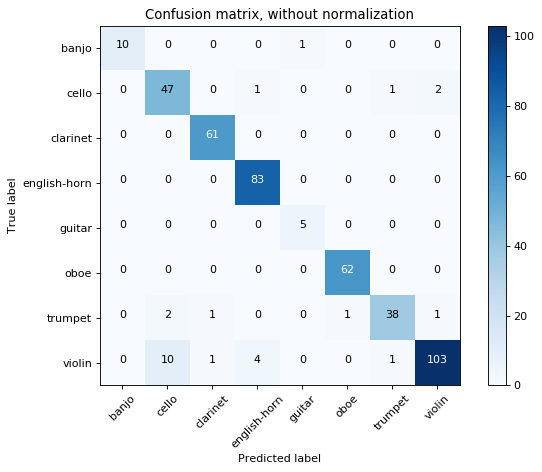

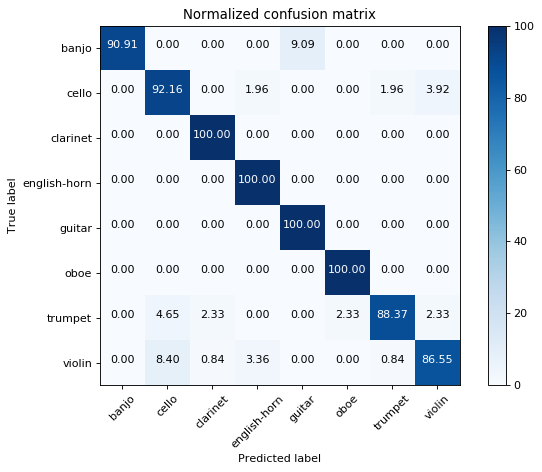

In [142]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, label_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6), dpi=80)
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6), dpi=80)
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')


plt.show()